<a href="https://colab.research.google.com/github/hsantos1985/core_projects/blob/main/Clusterizar_documentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo deste notebook é clusterizar artigos publicados no Daily Kos, um site de notícias políticas norte americana com um ponto de vista progressista. Este site foi fundado por Markos Moulitsas em 2002 e atualmente conta com centenas de milhares de visitas por dia.

O arquivo dailykos.csv contem dados de 3430 notícias postadas no site. Esses artigos foram postados em 2004, no período da eleição presidencial dos Estados Unidos. Os candidatos eram George W. Bush (pelo partido republicano) e John Kerry (democrata) e um dos principais temas do debate político na época era a invasão do Iraque (em 2003).

Cada variável do dataset é uma palavra que apareceu no mínimo em 50 artigos diferentes (1545 palavras no total). O valor da variável é o número de vezes que essa variável apareceu no dataset.

As etapas da análise são:

1 - Importação das bibliotecas

2 - Análise inicial do dataset

3 - Criação dos clusters

4 - Redução das variáveis

5 - Análise descritiva dos clusters

6 - Conclusão

#1 - Importação das bibliotecas



In [ ]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings

#Pre_processing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Metricas e visualização e otimização
from sklearn import metrics
from sklearn.model_selection import train_test_split,learning_curve,KFold, StratifiedKFold, LeaveOneOut, cross_validate, validation_curve, ParameterGrid, ParameterSampler, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.model_selection import LearningCurve
! pip install kneed
from kneed import KneeLocator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Word_Cloud
# !pip install -U pillow
import PIL
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from IPython.display import Image


warnings.filterwarnings("ignore")


#2 - Análise inicial do dataset

In [ ]:
#importação do dataset
df = pd.read_csv("https://raw.githubusercontent.com/abnr/ml-data/main/dailykos.csv")
df.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [ ]:
#Análise descritiva do datasets
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abandon,3430.0,0.020408,0.157046,0.0,0.0,0.0,0.0,2.0
abc,3430.0,0.034694,0.250326,0.0,0.0,0.0,0.0,6.0
ability,3430.0,0.032362,0.185040,0.0,0.0,0.0,0.0,2.0
abortion,3430.0,0.035277,0.385177,0.0,0.0,0.0,0.0,10.0
absolute,3430.0,0.018659,0.145713,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...
young,3430.0,0.042274,0.263935,0.0,0.0,0.0,0.0,5.0
youre,3430.0,0.067055,0.310494,0.0,0.0,0.0,0.0,3.0
youve,3430.0,0.033528,0.201442,0.0,0.0,0.0,0.0,3.0
zogby,3430.0,0.118950,0.523985,0.0,0.0,0.0,0.0,10.0


In [ ]:
#verificando o formato do datasets
df.shape

(3430, 1545)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Columns: 1545 entries, abandon to zone
dtypes: int64(1545)
memory usage: 40.4 MB


In [ ]:
#Verificou-se que o dataset é composto de 3430 linhas e 1545 colunas
#Devido a quantidade de colunas não foi possível verificar o tipo das mesmas

#3 - Criação dos clusters

In [ ]:
#escolha dos clusters pelo método do elbow
#Utilização do método do Kmeans
#Testando un range de 14 clusters para verificar qual seria o ideal
x=df

elb = []

for i in range(1, 14):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    print( i , kmeans.inertia_ )
    elb.append(kmeans.inertia_ )

1 896461.1247813414
2 817799.8968688042
3 786329.8142396811
4 765550.6685218932
5 750952.7536737642
6 738115.6950847756
7 729859.8510190251
8 724935.2516771958
9 716771.2174330973
10 710530.3130750395
11 707639.2214839957
12 702456.6377850684
13 703976.459667688


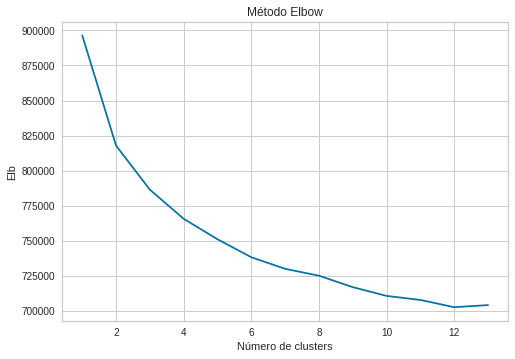

In [ ]:
#Verificando graficamente o número dos clusters por esse método verifica que o número de 2 clusters já é o suficiente

plt.plot(range(1,14),elb)
plt.title('Método Elbow')
plt.ylabel('Elb')
plt.xlabel('Número de clusters');

In [ ]:
#Verificação do número de clusters pelo método do Silhouete
#Cria-se 28 pontos para o silhouete score

sillhoute_scores = []

for i in range(2, 31):

    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    labels = kmeans.predict(x)
    print( i , silhouette_score(x, labels) )
    sillhoute_scores.append( silhouette_score(x, labels) )

2 0.2517539604671334
3 0.2321923178402833
4 0.2053819560902943
5 0.19843103550777583
6 0.18271704381843742
7 0.14271986963670244
8 0.1335058606753117
9 0.13969869270757812
10 0.0663770218294126
11 0.02849322644662706
12 0.0424223854707188
13 0.07755305997030656
14 0.06922381123514675
15 0.11030221390049075
16 0.05736558053634815
17 0.08435872715123517
18 0.04204499295472487
19 0.016252001373394706
20 -0.007048401724747231
21 0.02798335999498748
22 0.033198231322944256
23 0.004205395626746234
24 -0.015567325893557069
25 0.00869378935138413
26 -0.01767891281534015
27 -0.004956151174846393
28 0.061580652575250125
29 0.00383496759371232
30 0.004406730716758867


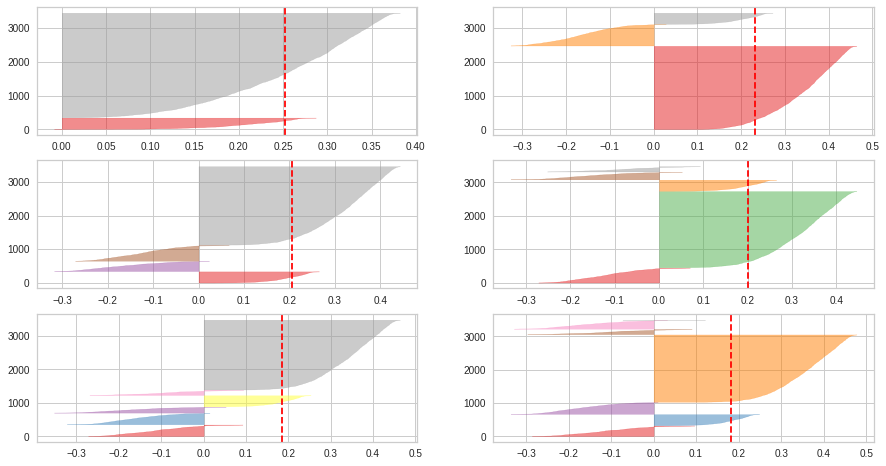

In [ ]:
#Através do spontos criados anteriormente, verifica-se nos gráficos abaixo, quais são os aqueles co valores positivos epróximos do 1
#Como só existe um gráfico onde só existem valores positivos, é escolhido 2 clusters

fir, ax = plt.subplots(3,2, figsize=(15, 8))
row = col = 0
for i in [2, 3, 4, 5, 6, 7]:

    km = KMeans(n_clusters = i)

    q, mod = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, color='yellowbrick', ax=ax[row][col])
    col = col + 1
    if col == 2:
        col = 0
        row += 1
    visualizer.fit(x)

#4 - Redução das variáveis

In [ ]:
#Para melhor entendiento dos 2 clusters será feita a redução das variáveis
#Atualmente são 1545
#PAra tanto será utilizado a PCA (Análise dos Componentes Principais)

In [ ]:
# instanciando standardscaler para centralizar os dados
std_scaler = StandardScaler()
# transformar os dados com o standardscaler
x_pca2 = std_scaler.fit_transform(df)

In [ ]:
x_pca2

array([[-0.12996881, -0.13861511, -0.1749151 , ..., -0.16646313,
        -0.22704413,  5.93589348],
       [-0.12996881, -0.13861511, -0.1749151 , ..., -0.16646313,
        -0.22704413, -0.10747685],
       [-0.12996881, -0.13861511, -0.1749151 , ..., -0.16646313,
        -0.22704413, -0.10747685],
       ...,
       [-0.12996881, -0.13861511, -0.1749151 , ..., -0.16646313,
        -0.22704413, -0.10747685],
       [-0.12996881, -0.13861511, -0.1749151 , ..., -0.16646313,
        -0.22704413, -0.10747685],
       [-0.12996881, -0.13861511, -0.1749151 , ..., -0.16646313,
        -0.22704413, -0.10747685]])

In [ ]:
#Utilizando o K-means na utilização das variáveis transformadas com o PCA
#inserindo estes clusters em uma nova coluna no dataset
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_pca2)
labels = kmeans.predict(x_pca2)
df['clusters']=labels

#5 -  Análise descritiva dos clusters

In [ ]:
#analisando o cluster 1
c1=df[df['clusters']==0].shape
c2=df[df['clusters']==1].shape
print(c1,c2)
#o cluster1 possui 331 registros e o cluster2 3099
#Assim como apresentado no método da Silhouete
#No gráfico com 2 clusters há 1 cluster mais registros que o outro

(331, 1546) (3099, 1546)


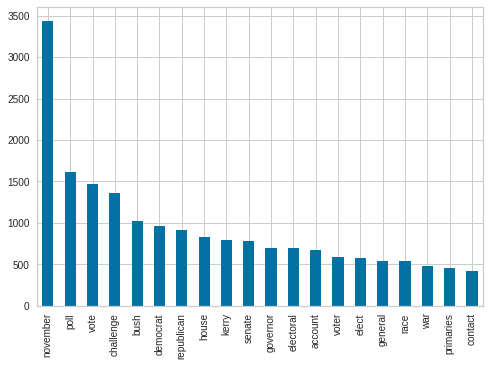

In [ ]:
#Ansalisando descritivamento o cluster 1
df[df['clusters']==0].sum().sort_values(ascending=False).iloc[0:20].plot(kind='bar');

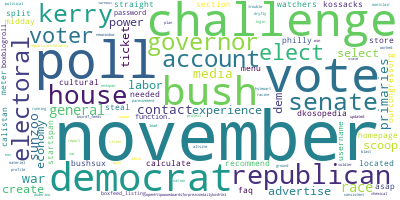

In [ ]:
wc = WordCloud(background_color='white')

wc.generate_from_frequencies(df[ df['clusters'] == 0 ].sum().sort_values(ascending=False).iloc[0:100])
wc.to_file('df.png')
image = Image('df.png', width=600, height=300)
image

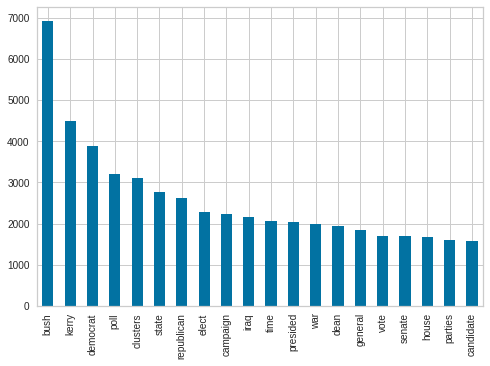

In [ ]:
#Ansalisando descritivamento o cluster 2
df[df['clusters']==1].sum().sort_values(ascending=False).iloc[0:20].plot(kind='bar');

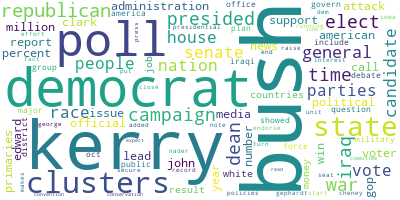

In [ ]:
wc = WordCloud(background_color='white')

wc.generate_from_frequencies(df[ df['clusters'] == 1 ].sum().sort_values(ascending=False).iloc[0:100])
wc.to_file('df.png')
image = Image('df.png', width=600, height=300)
image

In [ ]:
#Pela análise dos 2 clusters percebe-se que:
#1 o cluster 1 tem mais comentários relacionados às variáveis "novembro", "poll-votação", "challenge" e "vote"
#2 o cluster 2 tem mais comentários relacionados às variáveis "democrat", "bush", "kerry" e "clusters"

#6 - Conclusão

In [ ]:
#Conclui-se que existem 2 clusters que dividem os dados
#No cluster 1 existem 331 registros mais relacionados às variáveis "novembro", "poll-votação", "challenge" e "vote"
#No cluster 2 existem 3099 registros mais relacionados às variáveis "democrat", "bush", "kerry" e "clusters"